In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [249]:
data = pd.read_csv("steamdata_clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25306 entries, 0 to 25305
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                25306 non-null  object 
 1   steam_appid         25306 non-null  int64  
 2   controller_support  25306 non-null  int64  
 3   dlc                 25306 non-null  int64  
 4   short_description   25292 non-null  object 
 5   demos               25306 non-null  int64  
 6   platforms           25306 non-null  object 
 7   movies              25306 non-null  int64  
 8   achievements        25306 non-null  int64  
 9   release_date        25306 non-null  object 
 10  genres              25306 non-null  object 
 11  developer           25306 non-null  object 
 12  publisher           25306 non-null  object 
 13  owners              25306 non-null  object 
 14  average_forever     25306 non-null  int64  
 15  median_forever      25306 non-null  int64  
 16  init

In [250]:
# fill null with blank descriptions
data["short_description"] = data["short_description"].fillna("")

# Brief Overview on Games

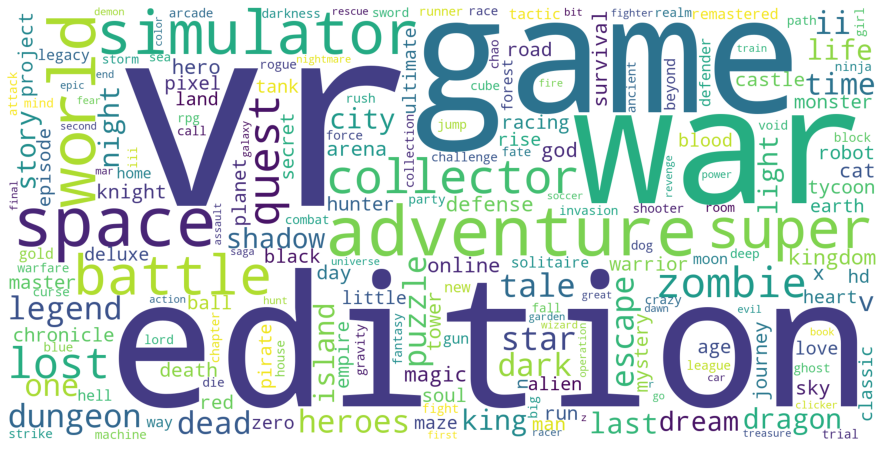

In [251]:
# fancy word clouds to see commonly used words in game titles and descriptions

from wordcloud import WordCloud, STOPWORDS
import re
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))
newStopWords = ["amp", "quot"]
sw = sw.union(newStopWords)

def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />", "")
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    
    sample = sample.split()
    
    sample = " ".join(sample)
    
    return sample

name_corpus = ' '.join(data["name"].apply(clean_text))
name_wordcloud = WordCloud(stopwords = sw, background_color = 'white', height = 1000, width = 2000).generate(name_corpus)
plt.figure(figsize=(16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

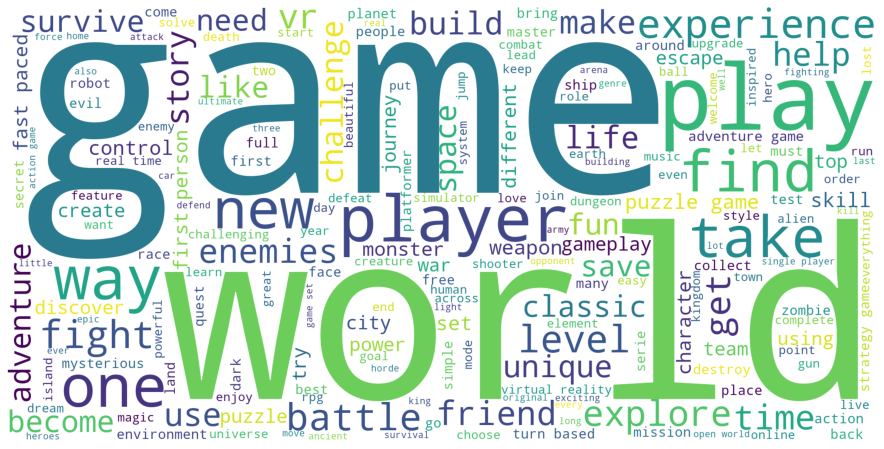

In [252]:
description_corpus = ' '.join(data["short_description"].apply(clean_text))
description_wordcloud = WordCloud(stopwords = sw, background_color = 'white', height = 1000, width = 2000).generate(description_corpus)
plt.figure(figsize=(16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

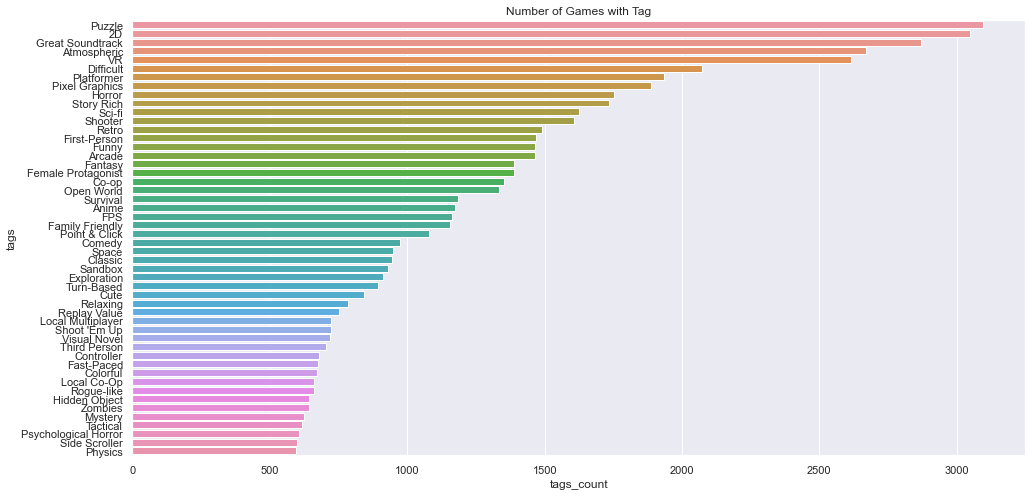

In [253]:
tags_count = pd.DataFrame(data.additional_tags.str.split(';').explode().value_counts()).reset_index()
tags_count.columns = ["tags", "tags_count"]
tags_count = tags_count[(tags_count["tags"] != "Singleplayer") & (tags_count["tags"] != "Multiplayer") & (tags_count["tags"] != "NSFW")]
f = plt.figure(figsize=(16, 8))
sb.barplot(x = "tags_count", y = "tags", data = tags_count.head(50))
plt.title("Number of Games with Tag");

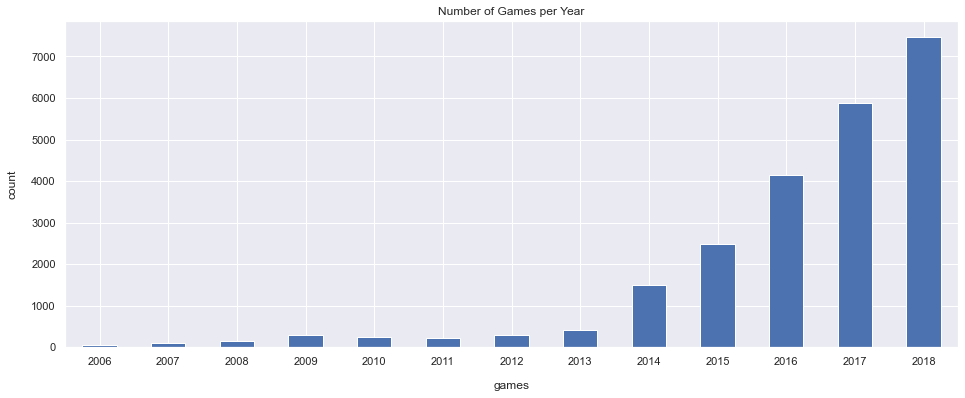

In [254]:
data["year"] = pd.to_datetime(data["release_date"]).dt.year
year_count = pd.DataFrame(data = data["year"].value_counts().sort_index())
year_count = year_count.loc[2006:2018]
f = plt.figure(figsize=(16, 6))
year_count["year"].plot(kind = "bar", rot = 0);
plt.xlabel("games", labelpad=14)
plt.ylabel("count", labelpad=14)
plt.title("Number of Games per Year");

In [255]:
data[["name", "developer", "genres", "initialprice", "rating"]].sort_values("rating", ascending = False).head(20)

,name,developer,genres,initialprice,rating
23,Portal 2,Valve,Action;Adventure,9.99,98.6
7312,Factorio,Wube Software LTD.,Casual;Indie;Simulation;Strategy;Early Access,30.00,98.4
2255,One Finger Death Punch,Silver Dollar Games,Action;Casual;Indie,4.99,98.0
7248,Iron Snout,SnoutUp,Action;Free to Play;Indie,0.00,97.8
17,Portal,Valve,Action,9.99,97.8
6885,TY the Tasmanian Tiger,Krome Studios,Action;Adventure;Indie,14.99,97.8
4236,Finding Paradise,Freebird Games,Adventure;Indie;RPG,9.99,97.8
7144,OneShot,Little Cat Feet,Adventure;Casual;Indie,9.99,97.8
2980,RimWorld,Ludeon Studios,Indie;Simulation;Strategy,34.99,97.7
2014,A Hat in Time,Gears for Breakfast,Adventure;Indie,29.99,97.7


Taking a look at the **top 20 games**, Action, Adventure, Indie seem to be common genres of top games. Notably, only 1 is a free-to-play game.

In [256]:
# we will only look at 'main' genres of games, since some titles on steam w/ genres eg. Photo Editing arent really games
genre_cols = ["Action",
            "Adventure",
            "Casual",
            "Indie",
            "Massively Multiplayer",
            "RPG",
            "Racing",
            "Simulation",
            "Sports",
            "Strategy"]

## Investigating Genres
We will perform **Dummy Encoding** on our categorical genres data. Then, we will observe the rating distribution across genres.

In [257]:
genre_encoding = data["genres"].str.get_dummies(';').filter(genre_cols)
genre_encoding

,Action,Adventure,Casual,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
25301,0,1,1,1,0,0,0,0,0,0
25302,1,1,0,1,0,0,0,0,0,0
25303,1,0,1,1,0,0,0,0,0,0
25304,0,1,1,1,0,0,0,0,0,0


In [258]:
data["rating"].describe()

count    25306.000000
mean        52.594764
std         25.264354
min          0.000000
25%         34.200000
50%         55.200000
75%         73.300000
max         98.600000
Name: rating, dtype: float64

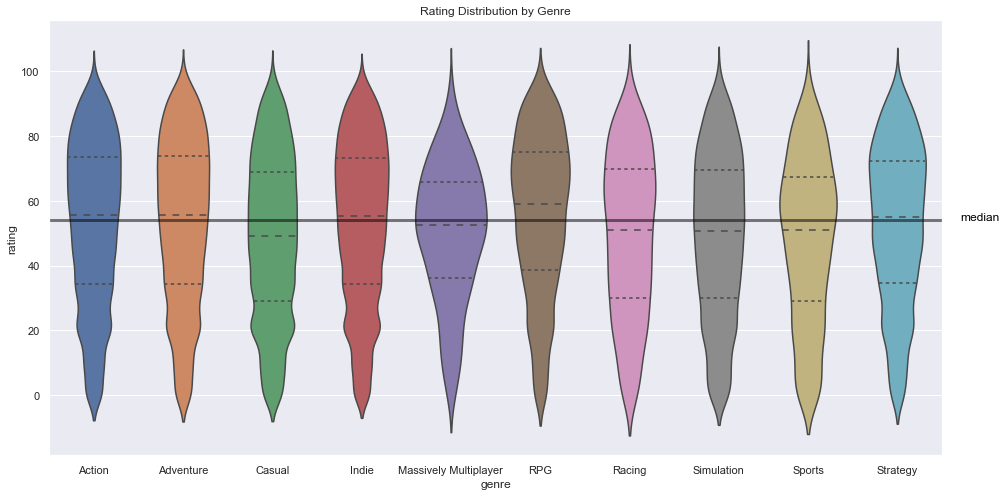

In [259]:
genres_df = data[["steam_appid", "rating", "initialprice"]]
genres_df = pd.concat([genres_df, genre_encoding], axis = "columns")

genres_data = pd.DataFrame()
# create new dataframe with each entry of genre to respective rating, as games can belong to multiple genres
for col in genre_cols:
    ratings = pd.DataFrame(genres_df.loc[genres_df[col] == 1, "rating"].values, columns = ["rating"])
    ratings["genre"] = col
    genres_data = pd.concat([genres_data, ratings], axis = 0)

fig, ax = plt.subplots(figsize=(16, 8))
sb.violinplot(x = "genre", y = "rating", data = genres_data, inner = "quartile", ax = ax)
ax.set_title("Rating Distribution by Genre")
ax.axhline(genres_data.rating.median(), color = "black", lw = 3, alpha = 0.5)
ax.text(9.7, genres_data.rating.median(), "median", color = 'black')
plt.show()

Not much variations in rating across genres, maybe because of how games can and often have multiple genres. eg. Action games usually come together with Adventure

- Massively Multiplayer games are mostly distributed around its median and tend to have much lower ratings than other genres 
- Racing, Simulation, Sports games have slightly lower ratings than most genres
- RPG games have much higher ratings than other genres
- Casual games have much lower ratings than other genres

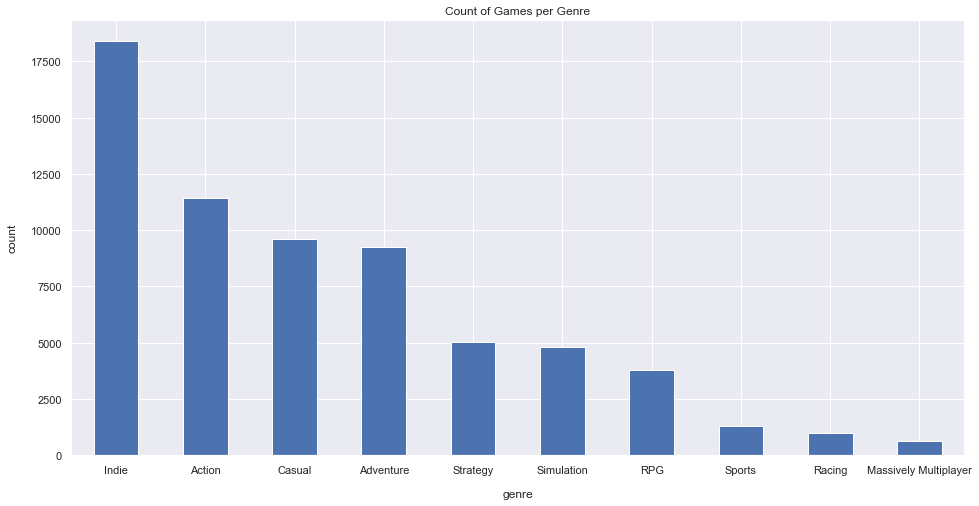

In [260]:
f = plt.figure(figsize=(16, 8))
genres_data["genre"].value_counts().plot(kind = "bar", rot = 0);
plt.xlabel("genre", labelpad=14)
plt.ylabel("count", labelpad=14)
plt.title("Count of Games per Genre");

- Massively Multiplayer games are fewest
- Very few Sports and Racing games
- A lot of Indie games aka games by non-AAA developers, meaning smaller development studios or solo-devs 

## Investigating Developers
We will use the ratings of games made by a developer to determine the score of that developer.
- However, developers have different number of games created. eg. A developer that has only 1 highly rated game (rating: 90) should not be considered as good as a developer that have 3 highly rated games (ratings: 90, 90, 90). 

Hence we will use **Bayesian Averaging** to also take into account the sample size when ranking a developer.

![Bayesian Average](https://i.stack.imgur.com/g9uew.png)
- S = score of dev
- R = average of game ratings for the dev
- C = average of game ratings for all devs
- w = weight assigned to R and computed as v/(v+m), where v = number of game ratings for that dev, m = average number of game ratings for all devs

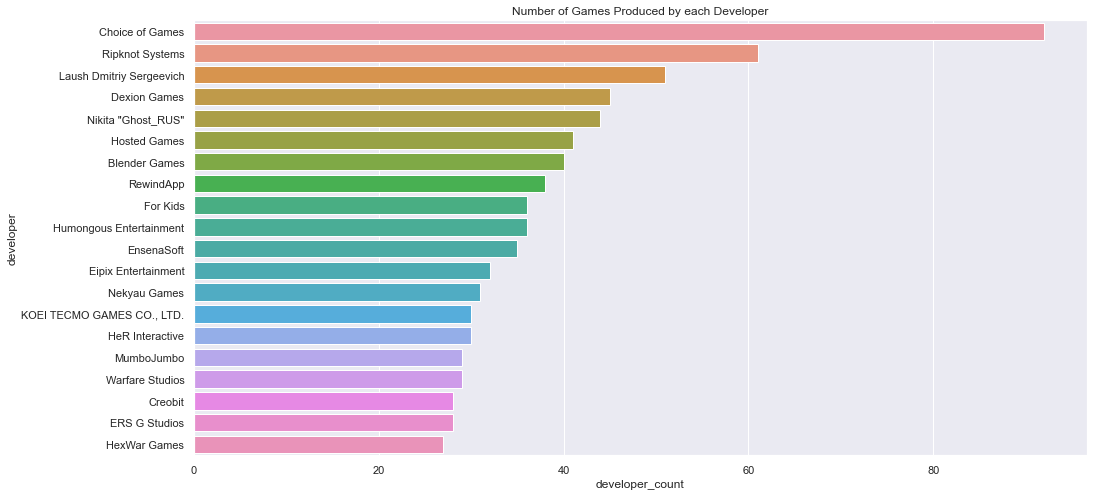

In [261]:
developer_count = pd.DataFrame(data.developer.str.split(';').explode().value_counts()).reset_index()
developer_count.columns = ["developer", "developer_count"]

f = plt.figure(figsize=(16, 8))
sb.barplot(x = "developer_count", y = "developer", data = developer_count.head(20))
plt.title("Number of Games Produced by each Developer");

In [262]:
# get top developers by scoring using Bayesian Average: S = wR + (1-w)C
# S = score of dev
# R = average of game ratings for the dev
# C = average of game ratings for all devs
# W = weight assigned to R and computed as v/(v+m), 
# where v = number of game ratings for that dev, m = average number of game ratings for all devs

developer_df = data[["rating", "developer"]]
ratings = developer_df.groupby(["developer"])["rating"].apply(list)
ratings = pd.DataFrame(ratings)
ratings = ratings.merge(developer_count, on = "developer")

ratings["R"] = ratings["rating"].apply(lambda x: sum(x)/len(x))
C = ratings["rating"].apply(lambda x: sum(x)).sum() / ratings["developer_count"].sum()
M = ratings["developer_count"].sum() / ratings.shape[0]
ratings["W"] = ratings["developer_count"] / (ratings["developer_count"]+M)
ratings["S"] = ratings["W"]*ratings["R"] + (1 - ratings["W"])*C

developer_data = ratings[["developer", "S"]]
developer_data = developer_data.rename(columns = {"S":"score"})

developer_data.sort_values(by = "score", ascending = False).head(20)

,developer,score
14357,Valve,86.205376
8,07th Expansion,85.901044
9314,Nihon Falcom,85.445068
9279,Nickervision Studios,85.284050
2977,Croteam,85.095288
11142,Relic Entertainment,85.033024
14669,Wadjet Eye Games,84.468218
11791,Scott Cawthon,84.133517
1055,Artifex Mundi,82.318785
11513,Rusty Lake,82.107559


## Other Categorical Variables

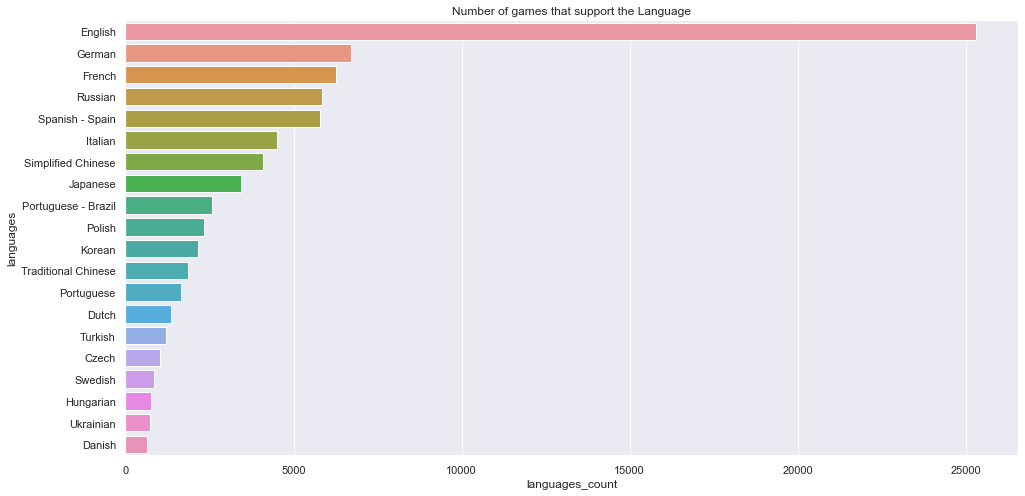

In [263]:
languages_count = pd.DataFrame(data.languages.str.split(';').explode().value_counts()).reset_index()
languages_count.columns = ["languages", "languages_count"]

f = plt.figure(figsize=(16, 8))
sb.barplot(x = "languages_count", y = "languages", data = languages_count.head(20))
plt.title("Number of games that support the Language");

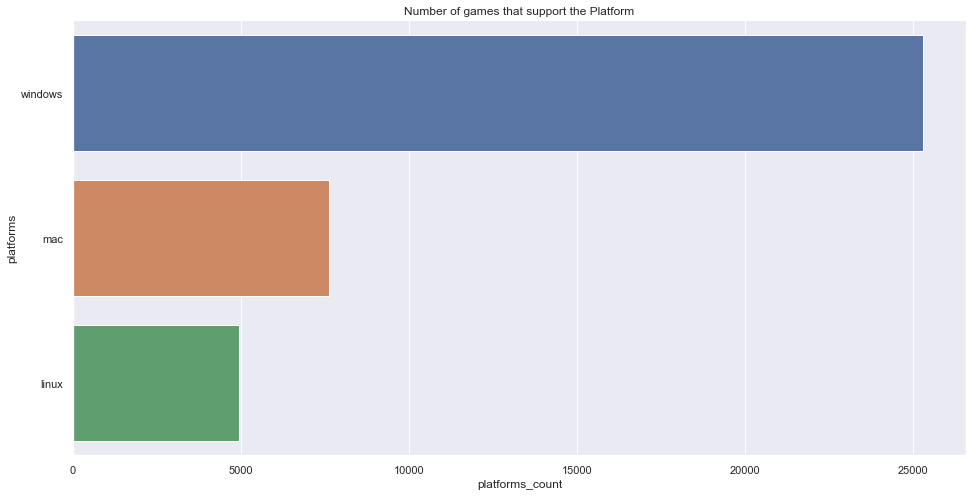

In [264]:
platforms_count = pd.DataFrame(data.platforms.str.split(';').explode().value_counts()).reset_index()
platforms_count.columns = ["platforms", "platforms_count"]

f = plt.figure(figsize=(16, 8))
sb.barplot(x = "platforms_count", y = "platforms", data = platforms_count.head(20))
plt.title("Number of games that support the Platform");

## Investigating Numeric Variables

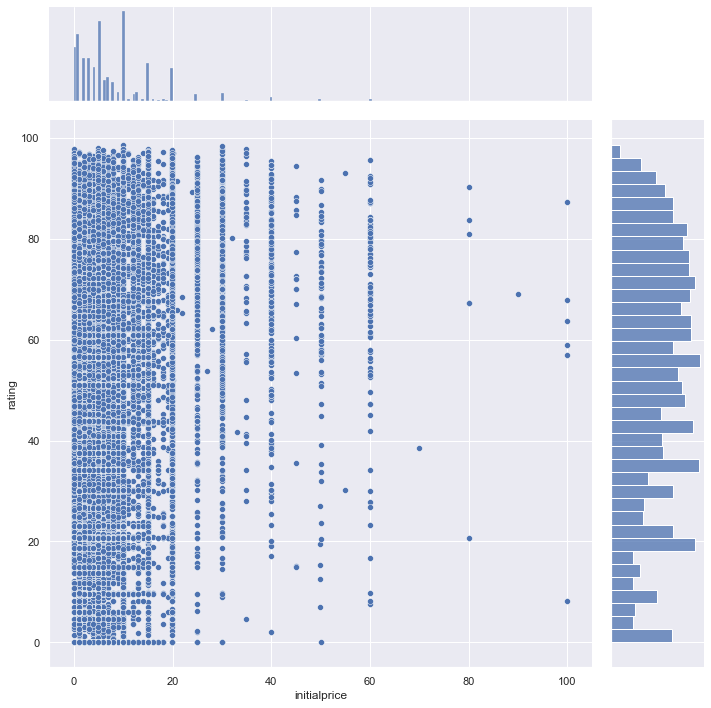

In [265]:
# remove extreme outliers distorting the scale
price_df = pd.concat([data[data["initialprice"] < 199]["initialprice"], data["rating"]], axis = 1)
sb.jointplot(data = price_df, x = "initialprice", y = "rating", height = 10)

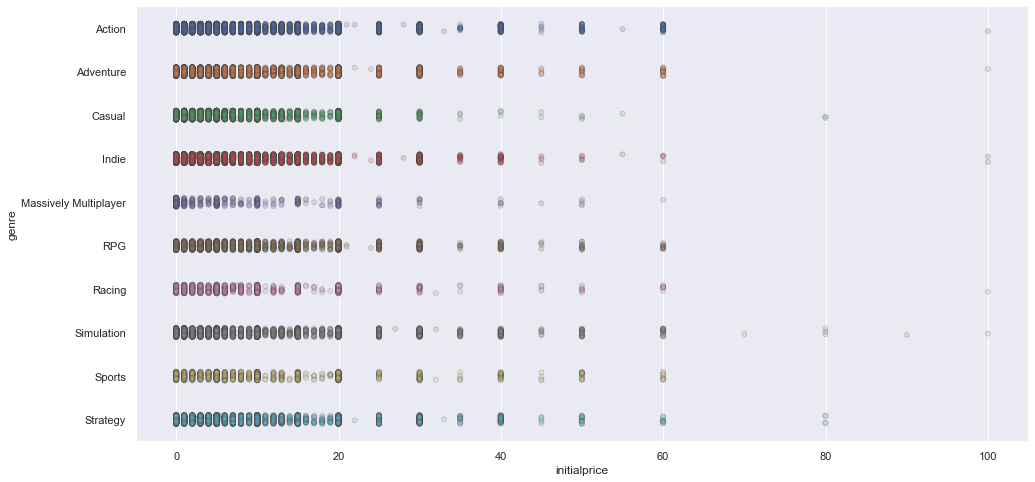

In [266]:
prices_data = pd.DataFrame()

for col in genre_cols:
    prices = pd.DataFrame(genres_df.loc[genres_df[col] == 1, "initialprice"].values, columns = ["initialprice"])
    prices["genre"] = col
    prices_data = pd.concat([prices_data, prices], axis = 0)
    
# remove extreme outliers distorting the scale
prices_data = prices_data[prices_data["initialprice"] < 100]
f = plt.figure(figsize=(16, 8))
ax = sb.stripplot(x="initialprice", y="genre", data=prices_data, jitter=True, alpha=0.2, linewidth=1);

Most games are priced below 20 dollars, almost all games are priced at 60 dollars or less.
- Games which are Massively Multiplayer tend to be free or cheaper, mainly because of the business model (free-to-play or low entry cost but huge amount of in-game microtransactions)

## Feature Engineering
- In our dataset, there are 10 genres, but over 300 additional tags, over 16000 developers, and over 13000 publishers. The large number of additional tags, developers and publishers are not really useful as features in our model. Furthermore, most developers and publishers have not made many games and so it is hard to learn anything about them. Hence we decide to discard `developer`, `publisher` and `additional_tags` in our models.
- For this analysis, we will not take into account the playtime and number of owners. This is because we want to take into account the inherent 'goodness' of the game itself. eg. There might be games that are under-rated or not as widely marketed, or short games (for instance: a replayable Battle Royale vs. Story-based game with definitive ending). Hence these games may not have as many owners or as much playtime, but people may still consider them as very good games.

In [267]:
var = data[["steam_appid", "controller_support", "dlc", "demos", "movies", "achievements", "is_multiplayer", "initialprice", "rating"]].copy()

In [268]:
# platforms -> no. of platforms supported, languages -> no. of languages supported
var["platforms"] = data["platforms"].apply(lambda x: len(x.split(';')))
var["languages"] = data["languages"].apply(lambda x: len(x.split(';')))

In [269]:
var = pd.concat([var, genres_df], axis = "columns")
var = var.loc[:,~var.columns.duplicated()]

In [270]:
# drop games with extreme outliers
cols = ["achievements", "initialprice", "languages"]

Q1 = var[cols].quantile(0.01)
Q3 = var[cols].quantile(0.99)
IQR = Q3 - Q1 # inter-quartile range

var = var[~((var[cols] < (Q1 - 1.5 * IQR)) | (var[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)].reset_index(drop = True)

<AxesSubplot:>

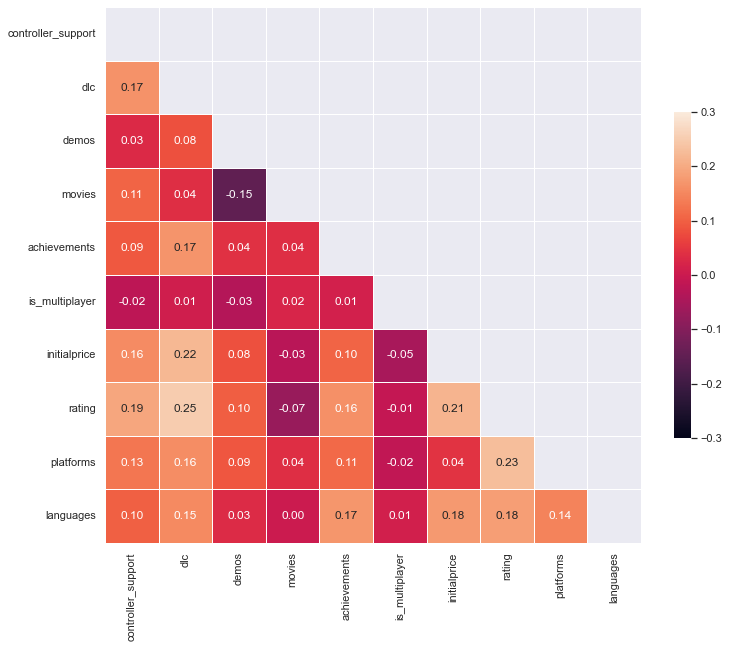

In [271]:
# Compute the correlation matrix
var_corr = var.loc[:,"controller_support":"languages"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(var_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(var_corr, mask=mask, cmap="rocket", vmin = -0.3, vmax = 0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt = ".2f")

`controller_support`, `dlc`, `demos`, `achievements`, `initialprice`, `platforms`, `languages` seem to be correlated with rating. Surprisingly, whether a game is multiplayer or not has almost no correlation to its rating.

<AxesSubplot:>

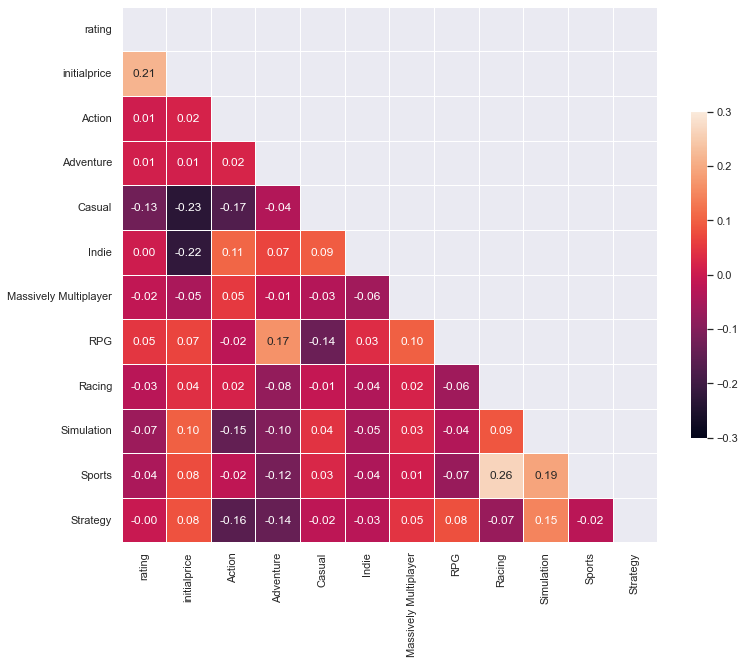

In [272]:
# Compute the correlation matrix
genres_corr = pd.concat([var[["rating", "initialprice"]], var.loc[:,"Action":]], axis = "columns").corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(genres_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(genres_corr, mask=mask, cmap="rocket", vmin = -0.3, vmax = 0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt = ".2f")

# it just goes downhill from here :(

## Regression Models 

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# X is inputs, y is output
X = var.drop(["rating", "steam_appid"], axis = 1)
y = var["rating"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # Splitting into train and test data

### Linear Regression

In [274]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [275]:
# K-Fold cross validation technique
validation_type = KFold(n_splits = 10)

# Cross validation score of Linear Regression model
cross_validation_lr = cross_val_score(lr, X_train, y_train, cv = validation_type, scoring = "r2")
print(f"Linear Regression R^2 (train): {cross_validation_lr.mean():.3f}")
cross_validation_lr = cross_val_score(lr, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"Linear Regression R^2 (test): {cross_validation_lr.mean():.3f}")

Linear Regression R^2 (train): 0.176
Linear Regression R^2 (test): 0.158


In [276]:
# Predict test set and calculate mean squared error
lr_predict = lr.predict(X_test)
print(f"Linear Regression MSE (test): {mean_squared_error(y_test, lr_predict):.3f}")
print(f"Linear Regression RMSE (test): {np.sqrt(mean_squared_error(y_test, lr_predict)):.3f}")
print(f"Intercept of regression: {lr.intercept_:3f}")
print(f"Coefficients of regression:", lr.coef_)

Linear Regression MSE (test): 540.190
Linear Regression RMSE (test): 23.242
Intercept of regression: 46.683885
Coefficients of regression: [ 6.90087572  9.86289198  3.61252222 -8.77311067  0.05362213 -0.58125874
  0.37144653  5.20178882  0.5509236  -1.53896526 -0.59149522 -3.96378911
  0.91660004 -0.8302802   1.15074081 -3.42329905 -3.05590536 -3.47513321
 -0.9134388 ]


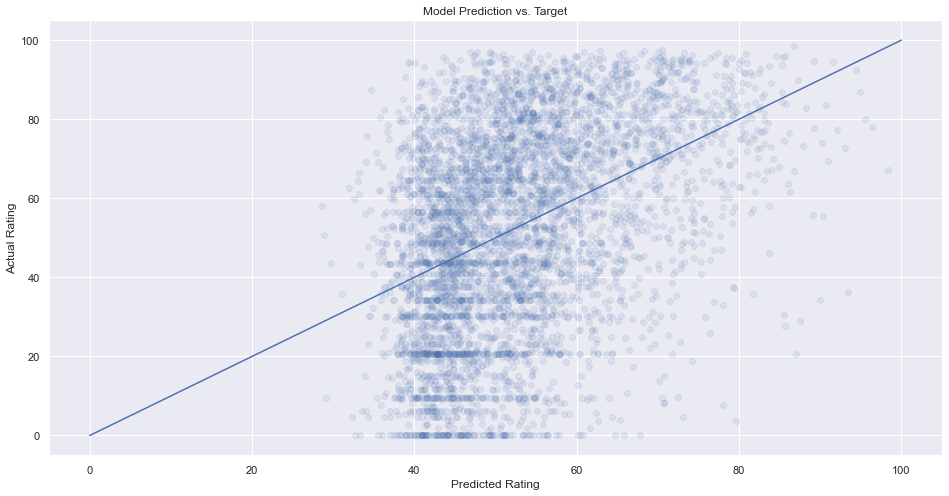

In [277]:
f = plt.figure(figsize=(16, 8))
plt.scatter(lr_predict, y_test, alpha=.1)
plt.plot(np.linspace(0,100), np.linspace(0,100))
plt.title('Model Prediction vs. Target')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

In [278]:
import scipy.stats as stats
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))

    pred = x

    plt.subplot(1, 3, 1)
    plt.scatter(x,y, alpha=.1)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res, alpha=.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    # Generates a probability plot of sample data against the quantiles of a specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot");

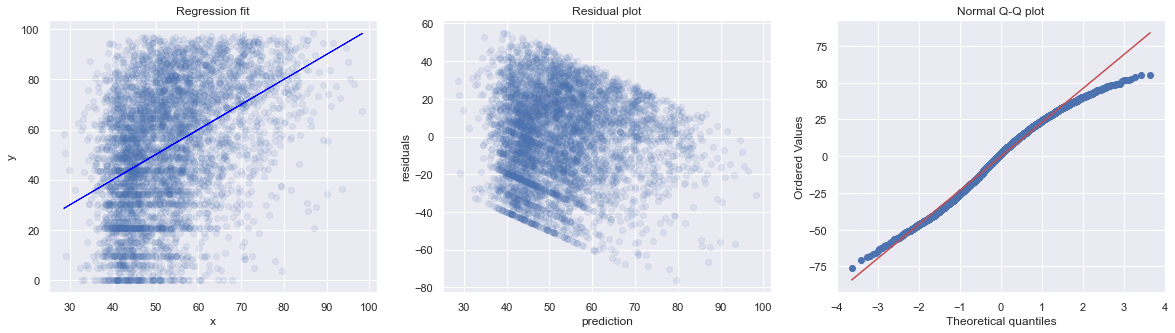

In [279]:
diagnostic_plot(lr_predict, y_test)

### Other

In [280]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv=10).fit(X_train, y_train)
print(f"Ridge Score: {ridge.score(X_test, y_test):3f}")

from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=10).fit(X_train, y_train)
print(f"Lasso Score: {lasso.score(X_test, y_test):3f}")

Ridge Score: 0.159985
Lasso Score: 0.160406


In [281]:
from sklearn.linear_model import HuberRegressor
hr = HuberRegressor(max_iter=5000)
hr.fit(X_train, y_train)

validation_type = KFold(n_splits = 10)

cross_validation_hr = cross_val_score(hr, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"HR R^2 (test): {cross_validation_hr.mean():.3f}")

HR R^2 (test): 0.155


In [282]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 50)
knn.fit(X_train, y_train)

cross_validation_knn = cross_val_score(knn, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"KNN R^2 (test): {cross_validation_knn.mean():.3f}")

KNN R^2 (test): 0.158


### Random Forest Regressor

In [283]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [284]:
# K-Fold cross validation technique
validation_type = KFold(n_splits = 10)

# Cross validation score of Random Forest Regressor model
cross_validation_rf = cross_val_score(rf, X_train, y_train, cv = validation_type, scoring = "r2")
print(f"Random Forest Regressor R^2 (train): {cross_validation_rf.mean():.3f}")
cross_validation_rf = cross_val_score(rf, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"Random Forest Regressor R^2 (test): {cross_validation_rf.mean():.3f}")

Random Forest Regressor R^2 (train): 0.185
Random Forest Regressor R^2 (test): 0.150


In [285]:
rf_predict = rf.predict(X_test)
print(f"Random Forest Regressor MSE (test): {mean_squared_error(y_test, rf_predict):.3f}")
print(f"Random Forest Regressor RMSE (test): {np.sqrt(mean_squared_error(y_test, rf_predict)):.3f}")

Random Forest Regressor MSE (test): 513.071
Random Forest Regressor RMSE (test): 22.651


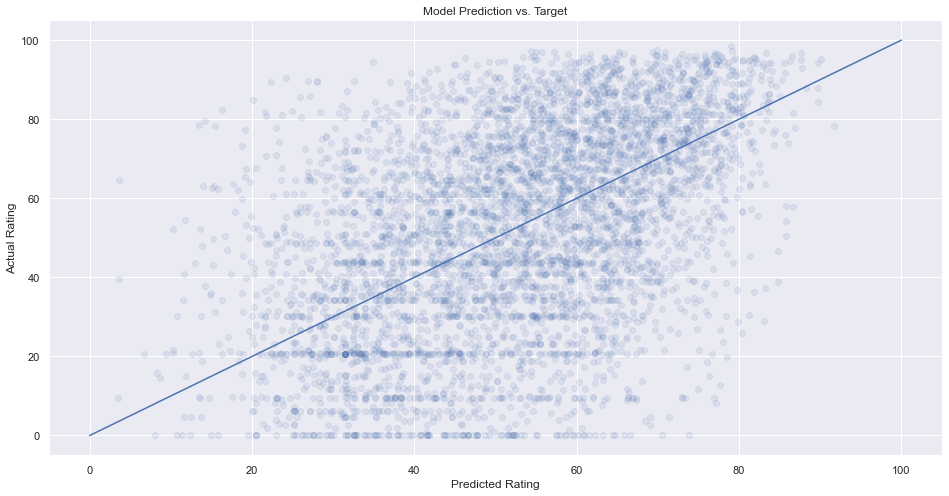

In [286]:
f = plt.figure(figsize=(16, 8))
plt.scatter(rf_predict, y_test, alpha=.1)
plt.plot(np.linspace(0,100), np.linspace(0,100))
plt.title('Model Prediction vs. Target')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

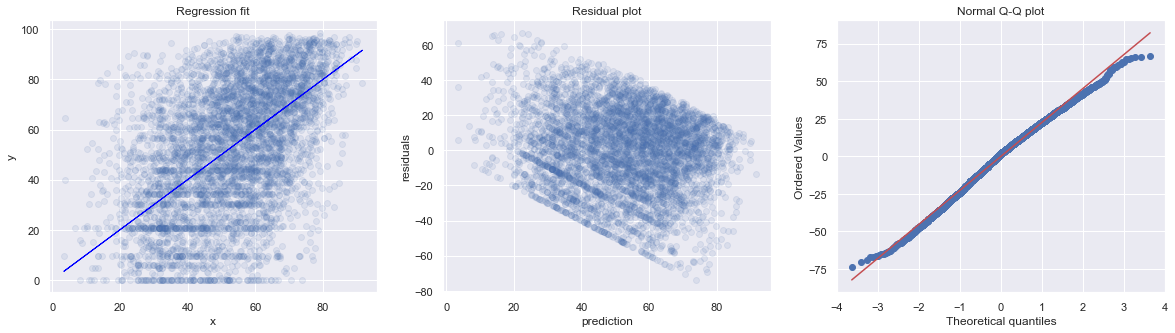

In [287]:
diagnostic_plot(rf_predict, y_test)